Predicting heart disease using machine learning model :
By using the given data and attributes we will be implementing machine learning model.
Main objective of the model to predcit if a person have heart disease or not. disease during the proof of concept, we will puruse the project.
We will try three different models:
Logistic Regression
K- Nearest Neighbours Classifier
Random Forest Classifier
The original data came from the Cleavland data from from UCI Machine Learning Repository.
There is also a version of the data available on Kaggle.
Data attribute information :
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    0: Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is  typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    0: Nothing to note
    1: ST-T Wave abnormality
    can range from mild symptoms to severe problems
    signals non-normal heart beat
    2: Possible or definite left ventricular hypertrophy
    Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    0: Upsloping: better heart rate with excercise (uncommon)
    1: Flatsloping: minimal change (typical healthy heart)
    2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    colored vessel means the doctor can see the blood passing through the more blood movement the better (no clots)
13. thal - thalium stress result
    1,3: normal
    6: fixed defect: used to be defect but ok now
    7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [2]:
# 1. Regular EDA(Exploratory Data Analysis) and Plotting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# To appear plots inside the notebook 
%matplotlib inline 

# 2. Models from Scikit-learn 
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# 3. Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, classification_report, f1_score
from sklearn.metrics import plot_roc_curve

# 4. Saving a Model
import pickle

In [3]:
df = pd.read_csv("/content/drive/MyDrive/python/projects/heart-disease-ml-classification/data/heart-disease.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Data Exploration (Exploratory Data Analysis(EDA)) :

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Finding Patterns In Data :

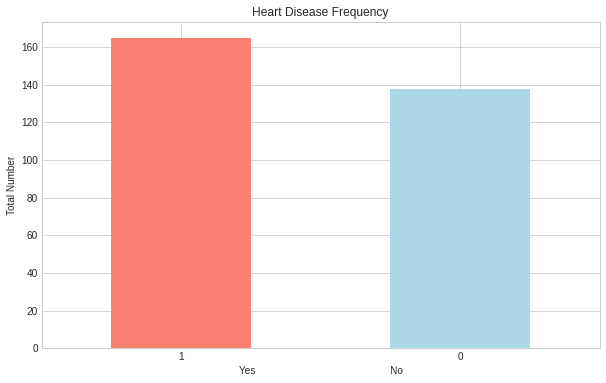

In [6]:
# Total number of classes in target column:
plt.style.use('seaborn-whitegrid')# it will work by deafult for charts 
df['target'].value_counts().plot(kind = 'bar', color = ["salmon", "lightblue"], figsize = (10,6))
plt.title("Heart Disease Frequency")
plt.ylabel('Total Number')
plt.xlabel("Yes                                                 No")
plt.xticks(rotation = 0);

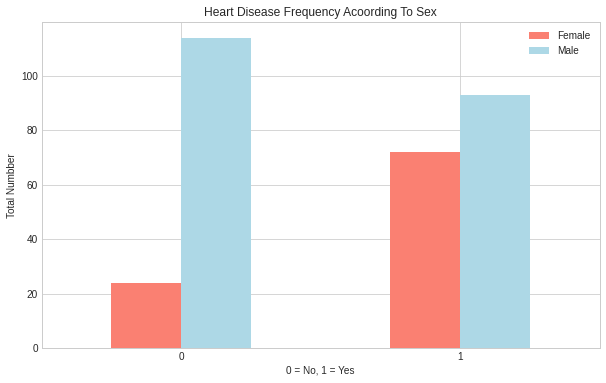

In [7]:
# Heart disease frequency according to sex
pd.crosstab(df.target, df.sex).plot(kind = 'bar', color = ["salmon", 'lightblue'], figsize = (10,6))
plt.title("Heart Disease Frequency Acoording To Sex")
plt.xlabel("0 = No, 1 = Yes")
plt.ylabel("Total Numbber")
plt.legend(['Female', 'Male'])
plt.xticks(rotation = 0);

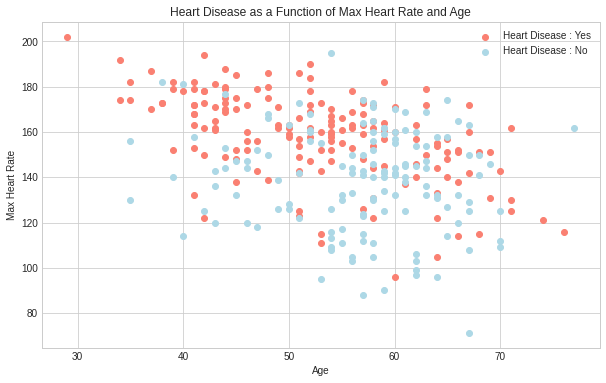

In [8]:
# Age vs Max Heart Rate for Heart Disease
plt.figure(figsize=(10,6))

# Scatter plot with heart disease = 1 values:
plt.scatter(df.age[df.target == 1],
                   df.thalach[df.target == 1],
                          c = "salmon")
# Scatter with with heart disease = 0 values:
plt.scatter(df.age[df.target == 0],
          df.thalach[df.target == 0],
          c = 'lightblue')

# Adding Information
plt.title("Heart Disease as a Function of Max Heart Rate and Age")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Heart Disease : Yes", "Heart Disease : No"]);

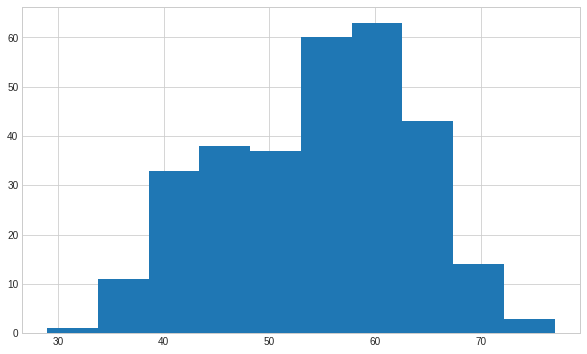

In [9]:
# Age Column Distribution 
df['age'].hist(figsize = (10,6));

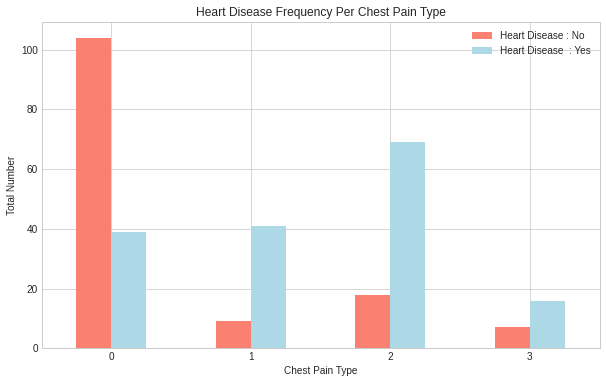

In [10]:
# Heart Disease Frequency Per Chest Pain Type :
pd.crosstab(df.cp,df.target).plot(kind = 'bar', color = ("salmon", 'lightblue'), figsize = (10,6))
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Total Number")
plt.legend(["Heart Disease : No", "Heart Disease  : Yes"])
plt.xticks(rotation = 0);

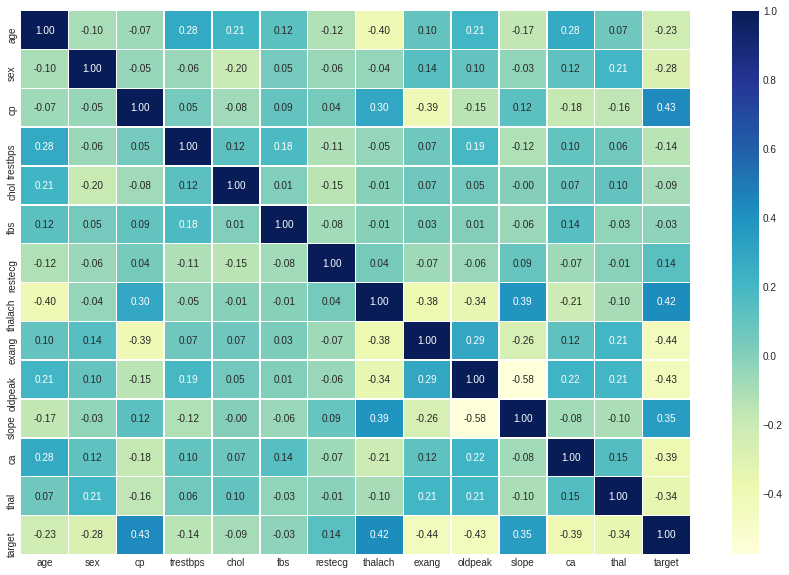

In [11]:
# Correlation Matrix Using Seaborn Heatmap
corr_maxtix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_maxtix,
                annot = True,
                linewidths=0.5,
                fmt= ".2f",
                cmap = "YlGnBu") # Yellow, Green, Blue

#### Splitting Data :

In [12]:
# Random Seed
np.random.seed(42)

# Splitting data into X and y
X = df.drop("target", axis = 1)
y = df["target"]

# Spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

#### Model Comparison :

In [13]:
# Putting Models in Dictionary :
models = {"Logestic Regression" : LogisticRegression(),
         "KNN" : KNeighborsClassifier(),
         "Random Forest Classifier" : RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fit and Evaluate Machine Learning Models with our data
    """
    np.random.seed(42)
    model_scores = {}  # a dictionary to keep the model score 
    for name, model in models.items():
        model.fit(X_train, y_train) # fitting data to model
        model_scores[name] = model.score(X_test, y_test) # evaluating model
    return model_scores

In [14]:
baseline_model_score = fit_and_score(models = models,
                                    X_train = X_train,
                                    X_test = X_test,
                                    y_train = y_train,
                                    y_test = y_test)
baseline_model_score

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.6885245901639344,
 'Logestic Regression': 0.8852459016393442,
 'Random Forest Classifier': 0.8360655737704918}

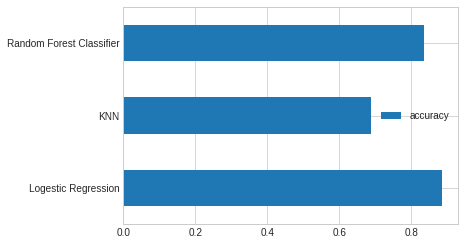

In [15]:
# Visulaization for model comparsion :
model_comparison = pd.DataFrame(baseline_model_score, index = ["accuracy"])
model_comparison.T.plot(kind = 'barh'); # T = transpose

#### Lets look at the following :
    1. Hyperperameter Tuning 
    2. Feature Importance
    3. Confusion Matrix
    4. Cross Validation 
    5. Precision
    6. Recall
    7. F1 Score
    8. Classification Report
    9. Recevier Operating Characterstic Curve (ROC)
    10. Area Under the Curve (AUC)

Maximum KNN Score on the test data : 75.41 %


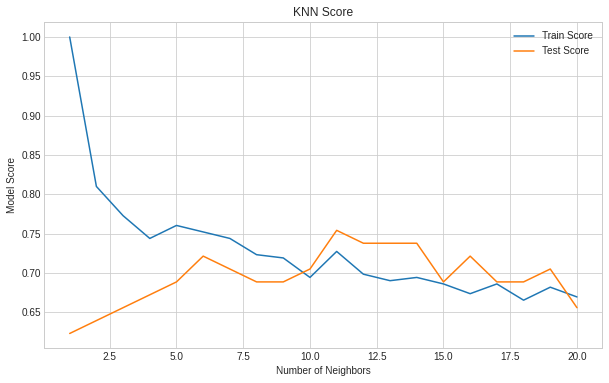

In [16]:
# 1. Hyperperameter Tuning (KNN)
train_scores = []
test_scores = []

#List of values for neighbors
neighbors = range(1,21)

# KNN Instance setup
knn = KNeighborsClassifier()

# Lopping through the range of neigbhors 
for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train) # fitting the traning data set 
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

train_scores, test_scores

# Plotting On Graph
plt.figure(figsize=(10,6))
plt.plot(neighbors, train_scores, label = "Train Score")
plt.plot(neighbors, test_scores, label = "Test Score")
plt.title("KNN Score")
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend();
print(f"Maximum KNN Score on the test data : {max(test_scores) * 100:.2f} %")

# we will be not pursuing this model further as after tuning its accuracy is stll below Logistic Regression

In [17]:
# Creating a grid for hyperperameter tuning:

# Creating Hyperperameter grid for Logestic Regression:
log_reg_grid = {'C' : np.logspace(-4,4,20),
               "solver" : ["liblinear"] }

# Creating Hyperperameter grid for Random Forest Regression:
rf_grid = {"n_estimators" : np.arange(10,1000,50),
          "max_depth" : [None, 3,  5, 10],
          "min_samples_split" : np.arange(2,20,2),
          "min_samples_leaf" : np.arange(1,22,2)}

In [18]:
# 1. Hyperperameter Tuning Using RandomizedSearchCV - Logistic Regression
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv = 5,
                               n_iter= 20,
                               verbose= True)
rs_log_reg.fit(X_train, y_train)
rs_log_reg.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


0.8852459016393442

In [19]:
# getting the best prams
rs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [20]:
# Score of our model, simillar as baseline score 
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [21]:
# 1. Hyperperameter Tuning Using RandomizedSearchCV - RandomForestClassifier

np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions= rf_grid,
                          cv = 5,
                          n_iter=20,
                          verbose= True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [22]:
# best params for model 
rs_rf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 19,
 'min_samples_split': 6,
 'n_estimators': 160}

In [23]:
# Score 
rs_rf.score(X_test, y_test)

0.8688524590163934

In [24]:
# As Logistic Regresssion Performed Best, we will move foward with it and improve it:
# 1. By using GridSearchCV
np.random.seed(42)

rs_log_grid = {"C" : np.logspace(-4,4,30),
              "solver" : ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid= rs_log_grid,
                          cv = 5,
                          verbose = True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [25]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [26]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

#### Model Evaluation : 
- ROC Curve and AUC score
- Confusion Matrix
- Classification Report
- Precission 
- Recall
- F1 Score
- Use Cross Validation wher ever possisble

In [27]:
# Making Predictions  ( Always Evaluate on test data sets )
y_preds = gs_log_reg.predict(X_test)

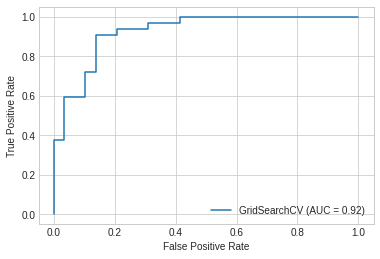

In [28]:
# ROC and AUC 

plot_roc_curve(gs_log_reg, X_test, y_test);

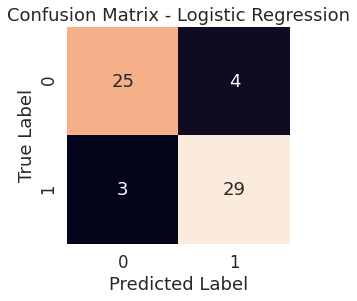

In [29]:
# Confusion Matrix 
sns.set(font_scale = 1.5)

def plot_conf_matrix(y_test, y_preds):
    """
    Plotting Confusion Matrix Using Seaborn's Heatmap
    """
    fig, ax = plt.subplots(figsize = (4,4))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot= True,
                    cbar = False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix - Logistic Regression")

plot_conf_matrix(y_test,y_preds); # true lables and predicted lables 

In [30]:
# Classification report on basis of one split that we have created above
log_reg_class_report = classification_report(y_test, y_preds)
print(log_reg_class_report)

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [31]:
# Classification report on basis of Cross Validation
# We will be using our best params for the same
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [32]:
# Creating a new classifier with best params 
clf = LogisticRegression(C = 0.20433597178569418,
                        solver= 'liblinear')

In [33]:
# Cross Val Accuracy 
cv_acc = cross_val_score(clf,
                        X, y,
                        cv = 5,
                        scoring= "accuracy")
cv_acc_mean = cv_acc.mean()
cv_acc_mean

0.8446994535519124

In [34]:
# Cross Val Precision
cv_prec = cross_val_score(clf, 
                          X,y,
                          cv =5,
                          scoring="precision")
cv_prec_mean = cv_prec.mean()
cv_prec_mean

0.8207936507936507

In [35]:
# Cross Val Recall
cv_recall = cross_val_score(clf,
                           X, y,
                           cv =5,
                           scoring="recall")
cv_recall_mean = cv_recall.mean()
cv_recall_mean

0.9212121212121213

In [36]:
# Cross Val F1 Score
cv_f1 = cross_val_score(clf,
                       X, y,
                       cv =5,
                       scoring="f1")
cv_f1_mean = cv_f1.mean()
cv_f1_mean

0.8673007976269721

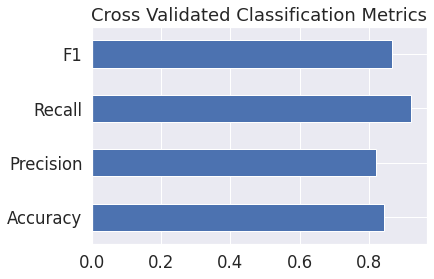

In [37]:
# Visualzation of Cross Val Score 
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc_mean,
                          "Precision" : cv_prec_mean,
                          "Recall" : cv_recall_mean,
                          "F1" : cv_f1_mean},
                         index = [0])
cv_metrics.T.plot.barh(title = "Cross Validated Classification Metrics", legend = False);

#### Feature Importance :
- Which all features contributed most towards the model
- How did they contribute in predicting the target ?

In [38]:
# Fit an instance of Logistic Regression 
clf = LogisticRegression(C = 0.20433597178569418,
                        solver= 'liblinear')
clf.fit(X_train, y_train);

In [39]:
# Check Coef - Coefficient 
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [40]:
# Matching Coefficent of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076883508599633,
 'ca': -0.6373332766360461,
 'chol': -0.0016649614843449207,
 'cp': 0.660014324982524,
 'exang': -0.604701713592625,
 'fbs': 0.040172360271308105,
 'oldpeak': -0.5679545646616215,
 'restecg': 0.31603405294617176,
 'sex': -0.8606204883695241,
 'slope': 0.4508539209693025,
 'thal': -0.6755509369619848,
 'thalach': 0.02458922341328129,
 'trestbps': -0.01155970600550047}

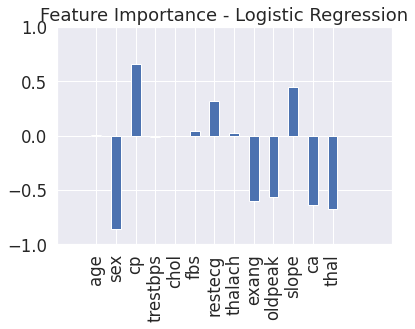

In [41]:
# Visualization of feature importance
features_df = pd.DataFrame(feature_dict,index = [0])
features_df.T.plot.bar(title = 'Feature Importance - Logistic Regression', legend = False)
plt.xlim(-2,15)
plt.ylim(-1, 1);

In [43]:
pickle.dump(clf, open("/content/drive/MyDrive/python/projects/heart-disease-ml-classification/heart-disease-ls.pkl", "wb"))

In [44]:
load_heart_disease_ls = pickle.load(open("/content/drive/MyDrive/python/projects/heart-disease-ml-classification/heart-disease-ls.pkl","rb"))
load_heart_disease_ls.score(X_test, y_test)

0.8852459016393442